# Ingest autophagy imaging data

The images used here were acquired as part of a study ([Publication](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.biorxiv.org/content/10.1101/2023.06.01.542416v1&ved=2ahUKEwj3m56hs52LAxWxRfEDHQZwKZ8QFnoECBIQAQ&usg=AOvVaw04HsGDIPcIPr1ldblXuh0Z)) on autophagy, a cellular process during which cells recycle their components in autophagosomes.
To identify genetic determinants of autophagy, the study tracked the formation of autophagosomes through microscopy of the fluorescent autophagosome marker mCherry-LC3B following treatment of cells with the autophagy inducer *Torin-1*.

Here, we ingest the microscopy data, consisting of TIFF image stacks and the corresponding metadata file - a standard format for such imaging experiments.

In [1]:
import lamindb as ln
import pandas as pd
import tifffile
import matplotlib.pyplot as plt

ln.track()

assert ln.setup.settings.instance.slug == "scportrait/examples"

→ connected lamindb: scportrait/examples
→ created Transform('fl9HcsEgLIr70000'), started new Run('JS8hDOb2...') at 2025-03-07 13:51:21 UTC
→ notebook imports: lamindb==1.1.1 matplotlib==3.10.0 pandas==2.2.3 tifffile==2025.2.18


In [2]:
# The metadata file contains the file paths of the images and all associated metadata
# We can load it later to annotate the imaging data
metadata = pd.read_csv("input_data_imaging_usecase/metadata_files.csv")
metadata.head(3)

,image_path,genotype,stimulation,cell_line,cell_line_clone,channel,FOV,magnification,microscope,imaged structure,resolution
0,input_data_imaging_usecase/images/Timepoint001...,WT,14h Torin-1,U2OS,U2OS lcklip-mNeon mCherryLC3B clone 1,Alexa488,FOV1,20X,Opera Phenix,LckLip-mNeon,0.597976
1,input_data_imaging_usecase/images/Timepoint001...,WT,14h Torin-1,U2OS,U2OS lcklip-mNeon mCherryLC3B clone 1,Alexa488,FOV2,20X,Opera Phenix,LckLip-mNeon,0.597976
2,input_data_imaging_usecase/images/Timepoint001...,WT,14h Torin-1,U2OS,U2OS lcklip-mNeon mCherryLC3B clone 1,DAPI,FOV1,20X,Opera Phenix,DNA,0.597976


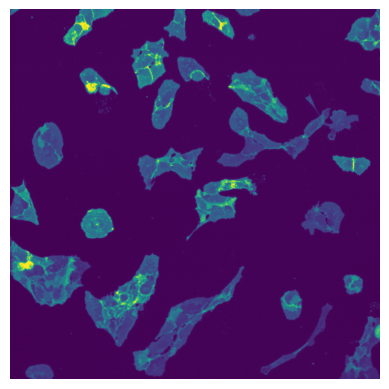

In [3]:
# An example image
img = tifffile.imread(metadata.iloc[0]["image_path"])
plt.imshow(img)
plt.axis("off")
plt.show()

In [4]:
# Ingest the imaging data directory, using the image_path prefix as the key
# This ensures that the image_path and loaded Artifact paths still align
artifacts = ln.Artifact.from_dir(
    "./input_data_imaging_usecase", key="input_data_imaging_usecase"
)
ln.save(artifacts)

... uploading metadata_files.csv: 100.0%
! The cache path /Users/sophia/Library/Caches/lamindb/lamin-eu-central-1/r7YUayXjktSb/input_data_imaging_usecase/metadata_files.csv already exists, replacing it.
... uploading config.yml: 100.0%
! The cache path /Users/sophia/Library/Caches/lamindb/lamin-eu-central-1/r7YUayXjktSb/input_data_imaging_usecase/config.yml already exists, replacing it.
... uploading Timepoint001_Row03_Well01_Alexa488_zstack001_r001_c008.tif: 100.0%
! The cache path /Users/sophia/Library/Caches/lamindb/lamin-eu-central-1/r7YUayXjktSb/input_data_imaging_usecase/images/Timepoint001_Row03_Well01_Alexa488_zstack001_r001_c008.tif already exists, replacing it.
... uploading Timepoint001_Row01_Well08_Alexa488_zstack001_r002_c009.tif: 100.0%
! The cache path /Users/sophia/Library/Caches/lamindb/lamin-eu-central-1/r7YUayXjktSb/input_data_imaging_usecase/images/Timepoint001_Row01_Well08_Alexa488_zstack001_r002_c009.tif already exists, replacing it.
... uploading Timepoint001_Row

In [5]:
ln.Collection(
    artifacts,
    key="input_data_imaging_usecase",
    description="TIFF stacks and metadata of mCherry-LC3B microscopy.",
).save()

Collection(uid='Rmih9GYkxu7XkfJb0000', is_latest=True, key='input_data_imaging_usecase', description='TIFF stacks and metadata of mCherry-LC3B microscopy.', hash='eTH09h0RFo1pKdh0MRcD8Q', created_by_id=4, space_id=1, run_id=674, created_at=2025-03-07 13:51:39 UTC)

In [6]:
ln.finish()

• please hit CMD + s to save the notebook in your editor .. ✓
→ finished Run('JS8hDOb2') after 22s at 2025-03-07 13:51:43 UTC
→ go to: https://lamin.ai/scportrait/examples/transform/fl9HcsEgLIr70000
→ to update your notebook from the CLI, run: lamin save /Users/sophia/Documents/GitHub/lamin-usecases/docs/imaging_ingest.ipynb
